<a href="https://colab.research.google.com/github/AchmadLutfi196/23059-datamining/blob/main/Sentimen_Ulasan_Aplikasi_Tiktok_Menggunakan_Metode_Klasifikasi_Support_Vector_Machine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen Ulasan Aplikasi Tiktok Menggunakan Metode Klasifikasi Algoritma SVM

# Impor paket yang diperlukan

In [8]:
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH_TOOLS ='/content/drive/MyDrive/datamining/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install kagglehub[pandas-datasets]
import pandas as pd

import numpy as np

In [10]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Path ke file CSV dalam dataset
file_path = "hasil_scraper_ulasan_app_tiktok.csv"

# Load dataset TikTok dari Kaggle sebagai DataFrame
df_busu = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fornigulo/ulasan-tik-tok-playstore",
    file_path
)


/tmp/ipython-input-10-3316289519.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_busu = kagglehub.load_dataset(


100%|██████████| 12.8M/12.8M [00:00<00:00, 18.4MB/s]


In [11]:
len(df_busu.index) #menghitung berapa jumlah data yg didapatkan

100000

In [72]:
df_busu= df_busu.sample(n=10000, random_state=42).reset_index(drop=True) # saya mengambil 10000 data

In [13]:
len(df_busu.index) #menghitung berapa jumlah data yg sudah diambil

10000

In [14]:
df_busu[['Review ID', 'Username', 'Rating', 'Review Text', 'Date']].head()  #dari dataset tsb didapatkan banyak sekali kolom, kemudian kolom" tsb saya filter

,Review ID,Username,Rating,Review Text,Date
0,29652493-d71f-4707-a232-cf9bc917373d,Pengguna Google,1,aplikasi tik tok sekarang jelek banget klok ma...,2025-01-03 14:30:50
1,198dbbd3-7580-4d78-967c-10cda1964317,Pengguna Google,5,mantap,2025-01-01 09:57:50
2,fa1c3fb5-2ee4-4938-b754-05b1339a19d8,Pengguna Google,5,Bagussssss,2025-02-06 11:16:07
3,12ce1cf7-6a3d-4351-97ea-f61cff85078a,Pengguna Google,5,Sangat memuaskan bagi aku,2025-01-03 05:52:46
4,a1fa2faa-db31-4fcc-9aa8-6b3327cf239e,Pengguna Google,5,Keluarga besar wawan herik menyampaikan Selama...,2024-12-25 09:19:49


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Review ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Review Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review Text')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review Text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Rating'}, axis=1)
              .sort_values('Rating', ascending=True))
  xs = counted['Rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Rating', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Review ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Review ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review Text'].value_counts()
    for x_label, grp in _df_12.groupby('Review ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review ID')
_ = plt.ylabel('Review Text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Date'].value_counts()
    for x_label, grp in _df_13.groupby('Review Text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review Text')
_ = plt.ylabel('Date')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Review ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='Review ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Review Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='Review Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Review ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Rating', y='Review ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [15]:
new_df = df_busu[['Username', 'Rating', 'Date', 'Review Text']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newest, change to True if you want to sort by Oldest.
sorted_df.head()

,Username,Rating,Date,Review Text
5605,Pengguna Google,5,2025-02-19 07:19:57,Bagus banget
5351,Pengguna Google,4,2025-02-19 06:56:37,"tiktok, tolong perbaiki fitur"" yang dulu ada s..."
3818,Pengguna Google,5,2025-02-19 06:48:30,Di Tiktok saya sangat terhibur dan senang kare...
409,Pengguna Google,1,2025-02-19 06:35:02,"apaan sih gak sesuai ekspektasi aku,dikit diki..."
2749,Pengguna Google,4,2025-02-19 06:28:12,Bagus keren


In [16]:
my_df = sorted_df[['Username', 'Rating', 'Date', 'Review Text']] #kemudian saya simpan ke variabel my_df

In [17]:
my_df = my_df[['Review Text', 'Rating']].rename(columns={'Review Text': 'content', 'Rating': 'score'})
# karena saya hanya membutuhkan kolom content dan score maka saya lakukan filter kolom lagi hingga menyisakan kolom content dan score.


In [18]:
my_df.head()

,content,score
5605,Bagus banget,5
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4
3818,Di Tiktok saya sangat terhibur dan senang kare...,5
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1
2749,Bagus keren,4


# **Hapus duplicate**

In [19]:
my_df.drop_duplicates(subset="content", keep='first', inplace=True)

In [20]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8089 entries, 5605 to 6640
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  8089 non-null   object
 1   score    8089 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 189.6+ KB


In [21]:
my_df.head(5)

,content,score
5605,Bagus banget,5
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4
3818,Di Tiktok saya sangat terhibur dan senang kare...,5
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1
2749,Bagus keren,4


# **Wordcloud**

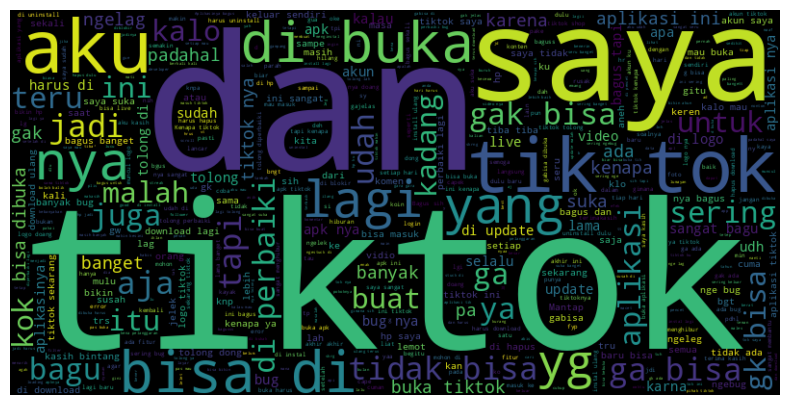

In [22]:
%pip install wordcloud

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
my_df['content'] = my_df['content'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(my_df['content'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# PEMBERSIHAN DATA
# data cleaning

In [23]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url= re.compile(r'https?://\S+/www\.\S+')
        return url.sub(r'', tweet)
    else:
      return tweet

#Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F" # emoticons
            u"\U0001F300-\U0001F5FF" # symbols & pictographs
            u"\U0001F680-\U0001F6FF" # transport & map symbols
            u"\U0001F700-\U0001F77F" # alchemical symbols
            u"\U0001F780-\U0001F7FF" # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F" # Chess Symbols
            u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF" # Additional emoticons
            u"\U0001F1E0-\U0001F1FF" # flags
                                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

#Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r' [^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers (tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

my_df['cleaning'] = my_df['content'].apply(lambda x: remove_URL(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_html(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_emoji(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_symbols(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_numbers(x))

my_df.head(10)

,content,score,cleaning
5605,Bagus banget,5,Bagus banget
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s..."
3818,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki..."
2749,Bagus keren,4,Bagus keren
7931,"BIKIN video jualan gak ngapa2in, gak aneh2 ken...",2,"BIKIN video jualan gak ngapain, gak aneh kena ..."
4502,Bagus banget semoga aku bikin tiktok aku ga di...,5,Bagus banget semoga aku bikin tiktok aku ga di...
9955,oh,4,oh
901,Ok,5,Ok
7528,tiktoknya update nya terlalu cepat dan saya ka...,3,tiktoknya update nya terlalu cepat dan saya ka...


# Text PreProcessing

# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [24]:
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text

my_df['case_folding'] = my_df['cleaning'].apply(case_folding)
my_df.head(5)

,content,score,cleaning,case_folding
5605,Bagus banget,5,Bagus banget,bagus banget
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s..."
3818,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki..."
2749,Bagus keren,4,Bagus keren,bagus keren


### **Normalisasi Kata**

In [25]:
import pandas as pd

#Fungsi penggantian kata tidak baku
def replace_taboo_words (text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku [word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash (word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = text
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [26]:
# Baca Dataset
data = pd.DataFrame(my_df[['content', 'score', 'cleaning', 'case_folding']])
data.head(5)

,content,score,cleaning,case_folding
5605,Bagus banget,5,Bagus banget,bagus banget
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s..."
3818,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki..."
2749,Bagus keren,4,Bagus keren,bagus keren


In [27]:
# Baca kamus kata tidak baku
# Download dataset kamus kata baku dari Kaggle
kamus_data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fornigulo/kamuskatabaku",
    "kamuskatabaku.xlsx"
)
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

/tmp/ipython-input-27-2144137481.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  kamus_data = kagglehub.load_dataset(


100%|██████████| 252k/252k [00:00<00:00, 1.07MB/s]


In [28]:
# Terapkan fungsi pengganti kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

my_df = pd.DataFrame(data[['content', 'score', 'cleaning', 'case_folding', 'normalisasi']])
my_df.head(10)

,content,score,cleaning,case_folding,normalisasi
5605,Bagus banget,5,Bagus banget,bagus banget,bagus banget
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s..."
3818,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih tidak sesuai ekspektasi aku,dikit di..."
2749,Bagus keren,4,Bagus keren,bagus keren,bagus keren
7931,"BIKIN video jualan gak ngapa2in, gak aneh2 ken...",2,"BIKIN video jualan gak ngapain, gak aneh kena ...","bikin video jualan gak ngapain, gak aneh kena ...","bikin video jualan tidak ngapain, tidak aneh k..."
4502,Bagus banget semoga aku bikin tiktok aku ga di...,5,Bagus banget semoga aku bikin tiktok aku ga di...,bagus banget semoga aku bikin tiktok aku ga di...,bagus banget semoga aku bikin tiktok aku tidak...
9955,oh,4,oh,oh,oh
901,Ok,5,Ok,ok,ok
7528,tiktoknya update nya terlalu cepat dan saya ka...,3,tiktoknya update nya terlalu cepat dan saya ka...,tiktoknya update nya terlalu cepat dan saya ka...,tiktoknya update ya terlalu cepat dan saya kal...


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [29]:
def tokenize(text):
    tokens = text.split()
    return tokens

my_df['tokenize'] = my_df['normalisasi'].apply(tokenize)
my_df.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize
5605,Bagus banget,5,Bagus banget,bagus banget,bagus banget,"[bagus, banget]"
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","[tiktok,, tolong, perbaiki, fitur"", yang, dulu..."
3818,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,"[di, tiktok, saya, sangat, terhibur, dan, sena..."
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih tidak sesuai ekspektasi aku,dikit di...","[apaan, sih, tidak, sesuai, ekspektasi, aku,di..."
2749,Bagus keren,4,Bagus keren,bagus keren,bagus keren,"[bagus, keren]"


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, saya dapat fokus pada kata-kata penting sebagai gantinya.

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

my_df['stopword removal'] = my_df['tokenize'].apply(remove_stopwords)

my_df.head()

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal
5605,Bagus banget,5,Bagus banget,bagus banget,bagus banget,"[bagus, banget]","[bagus, banget]"
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","[tiktok,, tolong, perbaiki, fitur"", yang, dulu...","[tiktok,, tolong, perbaiki, fitur"", ada,, fitu..."
3818,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,"[di, tiktok, saya, sangat, terhibur, dan, sena...","[tiktok, terhibur, senang, vlog, konten, kreat..."
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih tidak sesuai ekspektasi aku,dikit di...","[apaan, sih, tidak, sesuai, ekspektasi, aku,di...","[sih, sesuai, ekspektasi, aku,dikit, dikit, ng..."
2749,Bagus keren,4,Bagus keren,bagus keren,bagus keren,"[bagus, keren]","[bagus, keren]"


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia saya dapat menggunakan library Python Sastrawi yang sudah saya siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [32]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


In [33]:
from tqdm import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

my_df['steming_data'] = my_df['stopword removal'].apply(lambda x: stemmer.stem(' '.join(x)))
my_df.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
5605,Bagus banget,5,Bagus banget,bagus banget,bagus banget,"[bagus, banget]","[bagus, banget]",bagus banget
5351,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","[tiktok,, tolong, perbaiki, fitur"", yang, dulu...","[tiktok,, tolong, perbaiki, fitur"", ada,, fitu...",tiktok tolong baik fitur ada fitur sulap edit ...
3818,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,"[di, tiktok, saya, sangat, terhibur, dan, sena...","[tiktok, terhibur, senang, vlog, konten, kreat...",tiktok hibur senang vlog konten kreator keren ...
409,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih tidak sesuai ekspektasi aku,dikit di...","[apaan, sih, tidak, sesuai, ekspektasi, aku,di...","[sih, sesuai, ekspektasi, aku,dikit, dikit, ng...",sih sesuai ekspektasi aku dikit dikit ngebug b...
2749,Bagus keren,4,Bagus keren,bagus keren,bagus keren,"[bagus, keren]","[bagus, keren]",bagus keren


In [34]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8089 entries, 5605 to 6640
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           8089 non-null   object
 1   score             8089 non-null   int64 
 2   cleaning          8089 non-null   object
 3   case_folding      8089 non-null   object
 4   normalisasi       8089 non-null   object
 5   tokenize          8089 non-null   object
 6   stopword removal  8089 non-null   object
 7   steming_data      8089 non-null   object
dtypes: int64(1), object(7)
memory usage: 568.8+ KB


In [35]:
# Define BASE_PATH for saving files
BASE_PATH = ""  # Current directory, or specify your desired path like "data/"

my_df.to_csv(BASE_PATH + "hasil_TextPreProcessing_Tiktok.csv", index= False) #kemudian simpan hasil text preprocessing ke file csv

### **WORDCLOUD SETELAH PREPROCESSING**

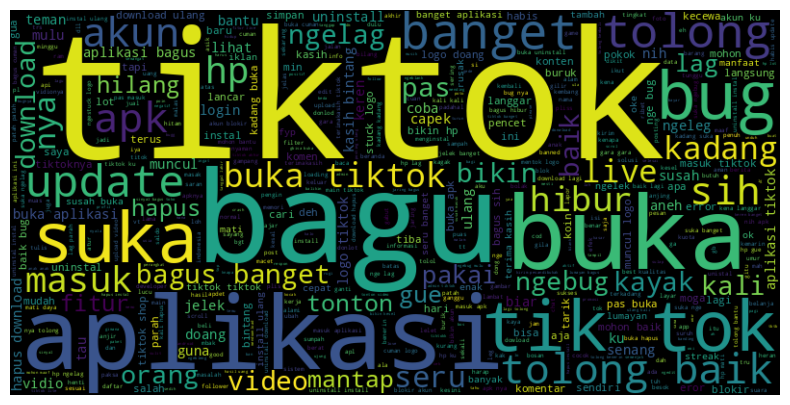

In [36]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'content'
text = ' '.join(my_df['steming_data'].astype(str).tolist())

stopwords=set (STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya'])

wc=WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

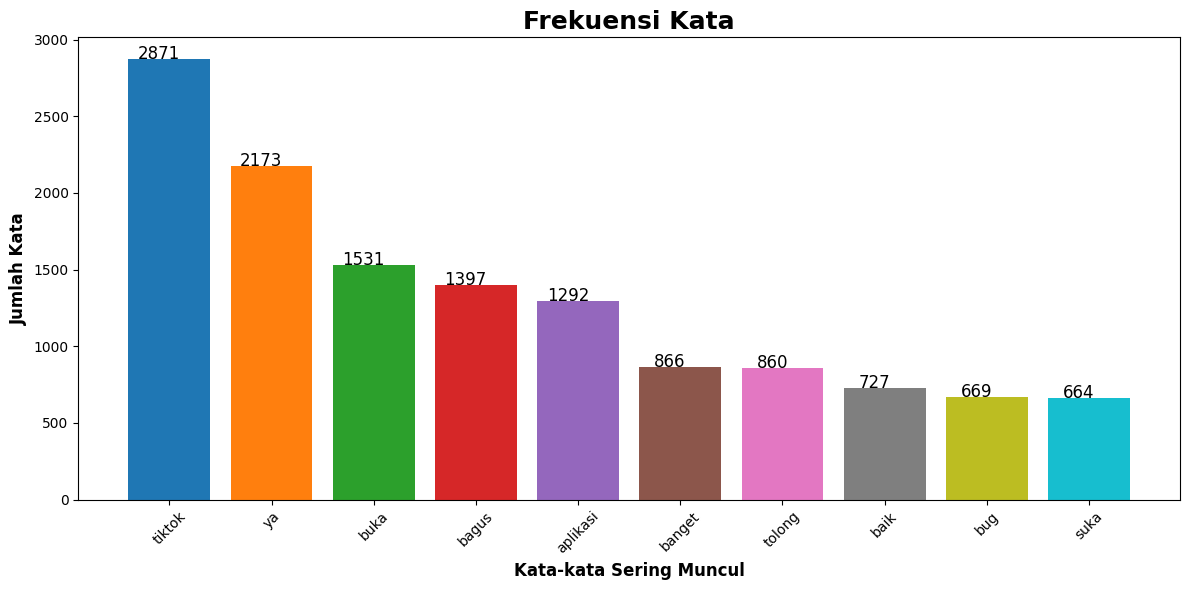

In [37]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks
text = " ".join(my_df['steming_data'])

tokens = text.split()
# Hitung frekuensi kata
word_count = Counter(tokens)

# Ambil 10 kata paling sering muncul
top_word = word_count.most_common(10)

# Pisahkan menjadi dua list: kata dan jumlahnya
word, count = zip(*top_word)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Frekuensi Kata', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan label angka di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


# **Labelling Data Lexicon Based**
Link github label positif & Negatif :  https://github.com/fajri91/InSet

In [38]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_TextPreProcessing_Tiktok.csv')
data.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,Bagus banget,5,Bagus banget,bagus banget,bagus banget,"['bagus', 'banget']","['bagus', 'banget']",bagus banget
1,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","['tiktok,', 'tolong', 'perbaiki', 'fitur""', 'y...","['tiktok,', 'tolong', 'perbaiki', 'fitur""', 'a...",tiktok tolong baik fitur ada fitur sulap edit ...
2,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,"['di', 'tiktok', 'saya', 'sangat', 'terhibur',...","['tiktok', 'terhibur', 'senang', 'vlog', 'kont...",tiktok hibur senang vlog konten kreator keren ...
3,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih tidak sesuai ekspektasi aku,dikit di...","['apaan', 'sih', 'tidak', 'sesuai', 'ekspektas...","['sih', 'sesuai', 'ekspektasi', 'aku,dikit', '...",sih sesuai ekspektasi aku dikit dikit ngebug b...
4,Bagus keren,4,Bagus keren,bagus keren,bagus keren,"['bagus', 'keren']","['bagus', 'keren']",bagus keren


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8089 entries, 0 to 8088
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           8089 non-null   object
 1   score             8089 non-null   int64 
 2   cleaning          8029 non-null   object
 3   case_folding      8029 non-null   object
 4   normalisasi       8024 non-null   object
 5   tokenize          8089 non-null   object
 6   stopword removal  8089 non-null   object
 7   steming_data      7944 non-null   object
dtypes: int64(1), object(7)
memory usage: 505.7+ KB


In [40]:
# Jika ada data kosong maka di drop
my_df = data.dropna()

In [41]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7944 entries, 0 to 8088
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           7944 non-null   object
 1   score             7944 non-null   int64 
 2   cleaning          7944 non-null   object
 3   case_folding      7944 non-null   object
 4   normalisasi       7944 non-null   object
 5   tokenize          7944 non-null   object
 6   stopword removal  7944 non-null   object
 7   steming_data      7944 non-null   object
dtypes: int64(1), object(7)
memory usage: 558.6+ KB


In [42]:
import pandas as pd

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return 'Positif'
    elif positive_count < negative_count:
        return 'Negatif'

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv(BASE_PATH_TOOLS + 'positive.tsv', sep='\t', header=None)[0])
negative_lexicon = set(pd.read_csv(BASE_PATH_TOOLS + 'negative.tsv', sep='\t', header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

my_df['Sentiment'] = my_df['steming_data'].apply(determine_sentiment)
my_df['Sentiment'] = replace_none_sentiment(my_df['Sentiment'].tolist())

my_df.head(10)


/tmp/ipython-input-42-341034993.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Sentiment'] = my_df['steming_data'].apply(determine_sentiment)
/tmp/ipython-input-42-341034993.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Sentiment'] = replace_none_sentiment(my_df['Sentiment'].tolist())


,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,Bagus banget,5,Bagus banget,bagus banget,bagus banget,"['bagus', 'banget']","['bagus', 'banget']",bagus banget,Positif
1,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","['tiktok,', 'tolong', 'perbaiki', 'fitur""', 'y...","['tiktok,', 'tolong', 'perbaiki', 'fitur""', 'a...",tiktok tolong baik fitur ada fitur sulap edit ...,Positif
2,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,"['di', 'tiktok', 'saya', 'sangat', 'terhibur',...","['tiktok', 'terhibur', 'senang', 'vlog', 'kont...",tiktok hibur senang vlog konten kreator keren ...,Negatif
3,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih tidak sesuai ekspektasi aku,dikit di...","['apaan', 'sih', 'tidak', 'sesuai', 'ekspektas...","['sih', 'sesuai', 'ekspektasi', 'aku,dikit', '...",sih sesuai ekspektasi aku dikit dikit ngebug b...,Positif
4,Bagus keren,4,Bagus keren,bagus keren,bagus keren,"['bagus', 'keren']","['bagus', 'keren']",bagus keren,Positif
5,"BIKIN video jualan gak ngapa2in, gak aneh2 ken...",2,"BIKIN video jualan gak ngapain, gak aneh kena ...","bikin video jualan gak ngapain, gak aneh kena ...","bikin video jualan tidak ngapain, tidak aneh k...","['bikin', 'video', 'jualan', 'tidak', 'ngapain...","['bikin', 'video', 'jualan', 'ngapain,', 'aneh...",bikin video jual ngapain aneh kena tegur kali ...,Negatif
6,Bagus banget semoga aku bikin tiktok aku ga di...,5,Bagus banget semoga aku bikin tiktok aku ga di...,bagus banget semoga aku bikin tiktok aku ga di...,bagus banget semoga aku bikin tiktok aku tidak...,"['bagus', 'banget', 'semoga', 'aku', 'bikin', ...","['bagus', 'banget', 'semoga', 'bikin', 'tiktok...",bagus banget moga bikin tiktok blokir akun,Positif
7,oh,4,oh,oh,oh,['oh'],['oh'],oh,Negatif
8,Ok,5,Ok,ok,ok,['ok'],['ok'],ok,Positif
9,tiktoknya update nya terlalu cepat dan saya ka...,3,tiktoknya update nya terlalu cepat dan saya ka...,tiktoknya update nya terlalu cepat dan saya ka...,tiktoknya update ya terlalu cepat dan saya kal...,"['tiktoknya', 'update', 'ya', 'terlalu', 'cepa...","['tiktoknya', 'update', 'ya', 'cepat', 'update...",tiktoknya update ya cepat update loading ya ba...,Positif


/tmp/ipython-input-43-2336621753.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="pastel")


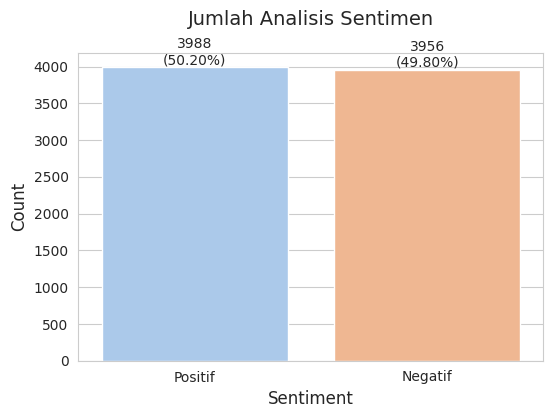

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = my_df['Sentiment'].value_counts()
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="pastel")
plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

total = len(my_df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10,f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [44]:
my_df.to_csv(BASE_PATH + "hasil_Labelling_Data.csv",encoding='utf8', index= False) #kemudian simpan hasil text preprocessing ke file csv

# **ALGORITMA SUPPORT VECTOR MACHINE (SVM)**

In [45]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_Labelling_Data.csv')
data.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,Bagus banget,5,Bagus banget,bagus banget,bagus banget,"['bagus', 'banget']","['bagus', 'banget']",bagus banget,Positif
1,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","['tiktok,', 'tolong', 'perbaiki', 'fitur""', 'y...","['tiktok,', 'tolong', 'perbaiki', 'fitur""', 'a...",tiktok tolong baik fitur ada fitur sulap edit ...,Positif
2,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,"['di', 'tiktok', 'saya', 'sangat', 'terhibur',...","['tiktok', 'terhibur', 'senang', 'vlog', 'kont...",tiktok hibur senang vlog konten kreator keren ...,Negatif
3,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih tidak sesuai ekspektasi aku,dikit di...","['apaan', 'sih', 'tidak', 'sesuai', 'ekspektas...","['sih', 'sesuai', 'ekspektasi', 'aku,dikit', '...",sih sesuai ekspektasi aku dikit dikit ngebug b...,Positif
4,Bagus keren,4,Bagus keren,bagus keren,bagus keren,"['bagus', 'keren']","['bagus', 'keren']",bagus keren,Positif


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7944 entries, 0 to 7943
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           7944 non-null   object
 1   score             7944 non-null   int64 
 2   cleaning          7944 non-null   object
 3   case_folding      7944 non-null   object
 4   normalisasi       7944 non-null   object
 5   tokenize          7944 non-null   object
 6   stopword removal  7944 non-null   object
 7   steming_data      7944 non-null   object
 8   Sentiment         7944 non-null   object
dtypes: int64(1), object(8)
memory usage: 558.7+ KB


In [47]:
my_df = data.dropna()

In [48]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7944 entries, 0 to 7943
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           7944 non-null   object
 1   score             7944 non-null   int64 
 2   cleaning          7944 non-null   object
 3   case_folding      7944 non-null   object
 4   normalisasi       7944 non-null   object
 5   tokenize          7944 non-null   object
 6   stopword removal  7944 non-null   object
 7   steming_data      7944 non-null   object
 8   Sentiment         7944 non-null   object
dtypes: int64(1), object(8)
memory usage: 558.7+ KB


**Spliting Data**

memecah data test 20% dari keseluruhan data

In [49]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(my_df['steming_data'], my_df['Sentiment'], test_size=0.2, random_state=42)

In [50]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'Sentiment': y_train})
train_set.to_csv(BASE_PATH + 'train_data.csv', index=False)

In [51]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'Sentiment': y_test})
test_set.to_csv(BASE_PATH + 'test_data.csv', index=False)

In [52]:
# Menampilkan informasi jumlah data
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 6355
Jumlah data uji: 1589


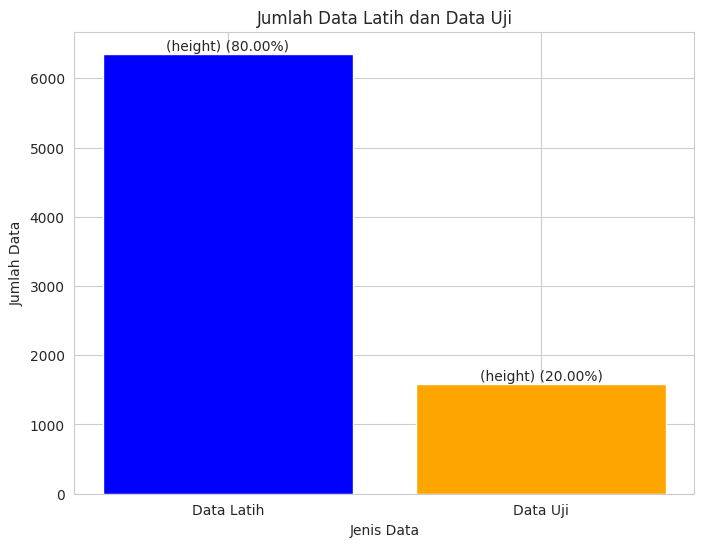

In [53]:
import matplotlib.pyplot as plt

#Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars= plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'(height) ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

### **SUPPORT VECTOR MACHINE (SVM)**

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# Mendefinisikan vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [56]:
# Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())

#menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
# Membuat dan melatih model SVM (model jenis linear)
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [58]:
# Evaluasi model
y_pred_svm = svm.predict(X_test_vectorized)

In [59]:
# Menampilkan confusion matrix dalam angka
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(cm_svm)

Confusion Matrix (SVM):
[[653 138]
 [183 615]]


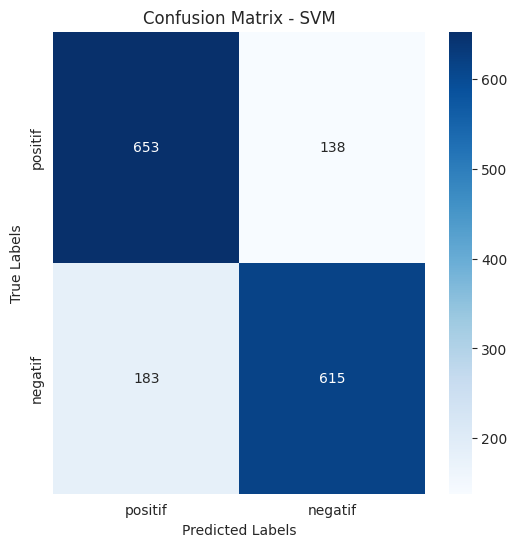

In [60]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['positif', 'negatif'],
                yticklabels=['positif', 'negatif'])

    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix('SVM', y_test, y_pred_svm)

In [61]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)

#Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.78      0.83      0.80       791
     Positif       0.82      0.77      0.79       798

    accuracy                           0.80      1589
   macro avg       0.80      0.80      0.80      1589
weighted avg       0.80      0.80      0.80      1589



# **WORDCLOUD**

In [62]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_Labelling_Data.csv')
data.head()

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,Bagus banget,5,Bagus banget,bagus banget,bagus banget,"['bagus', 'banget']","['bagus', 'banget']",bagus banget,Positif
1,"tiktok, tolong perbaiki fitur"" yang dulu ada s...",4,"tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","tiktok, tolong perbaiki fitur"" yang dulu ada s...","['tiktok,', 'tolong', 'perbaiki', 'fitur""', 'y...","['tiktok,', 'tolong', 'perbaiki', 'fitur""', 'a...",tiktok tolong baik fitur ada fitur sulap edit ...,Positif
2,Di Tiktok saya sangat terhibur dan senang kare...,5,Di Tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,di tiktok saya sangat terhibur dan senang kare...,"['di', 'tiktok', 'saya', 'sangat', 'terhibur',...","['tiktok', 'terhibur', 'senang', 'vlog', 'kont...",tiktok hibur senang vlog konten kreator keren ...,Negatif
3,"apaan sih gak sesuai ekspektasi aku,dikit diki...",1,"apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih gak sesuai ekspektasi aku,dikit diki...","apaan sih tidak sesuai ekspektasi aku,dikit di...","['apaan', 'sih', 'tidak', 'sesuai', 'ekspektas...","['sih', 'sesuai', 'ekspektasi', 'aku,dikit', '...",sih sesuai ekspektasi aku dikit dikit ngebug b...,Positif
4,Bagus keren,4,Bagus keren,bagus keren,bagus keren,"['bagus', 'keren']","['bagus', 'keren']",bagus keren,Positif


In [63]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif'] ['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif'] ['steming_data'].str.cat(sep=' ')

In [64]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

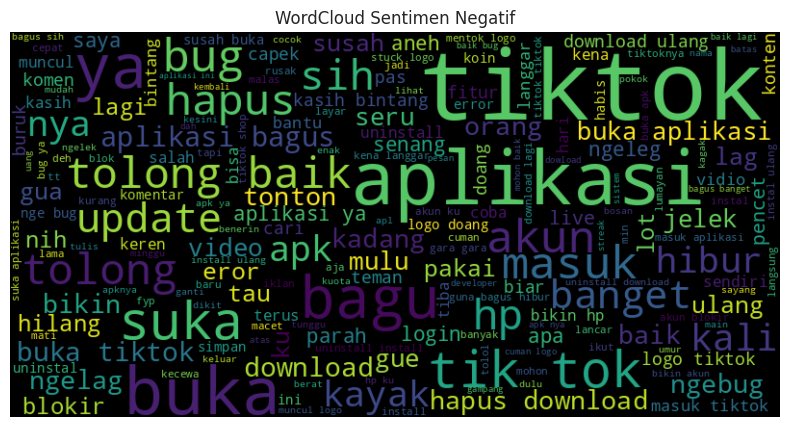

In [65]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

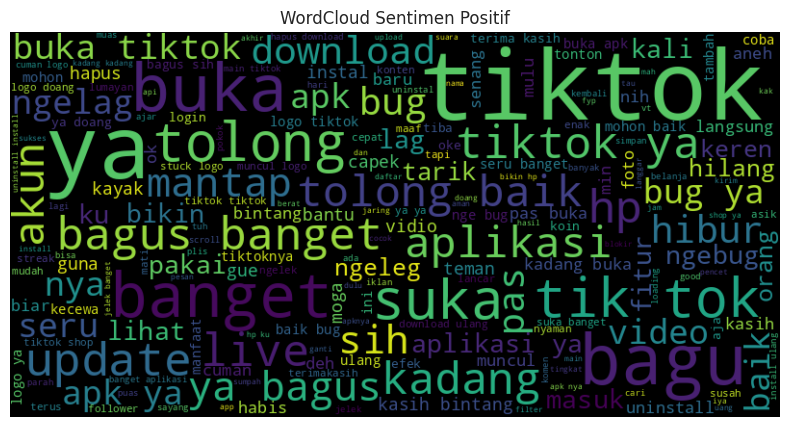

In [66]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

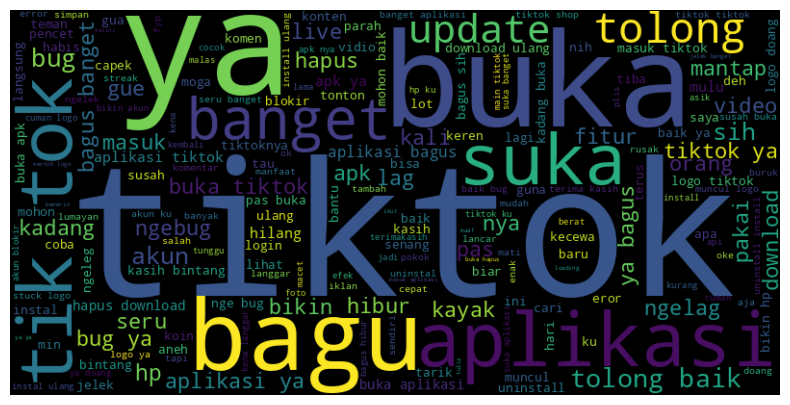

In [67]:
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## **RATING**

In [68]:
import pandas as pd

data = pd.read_csv(BASE_PATH + "hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7944 entries, 0 to 7943
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           7944 non-null   object
 1   score             7944 non-null   int64 
 2   cleaning          7944 non-null   object
 3   case_folding      7944 non-null   object
 4   normalisasi       7944 non-null   object
 5   tokenize          7944 non-null   object
 6   stopword removal  7944 non-null   object
 7   steming_data      7944 non-null   object
 8   Sentiment         7944 non-null   object
dtypes: int64(1), object(8)
memory usage: 558.7+ KB


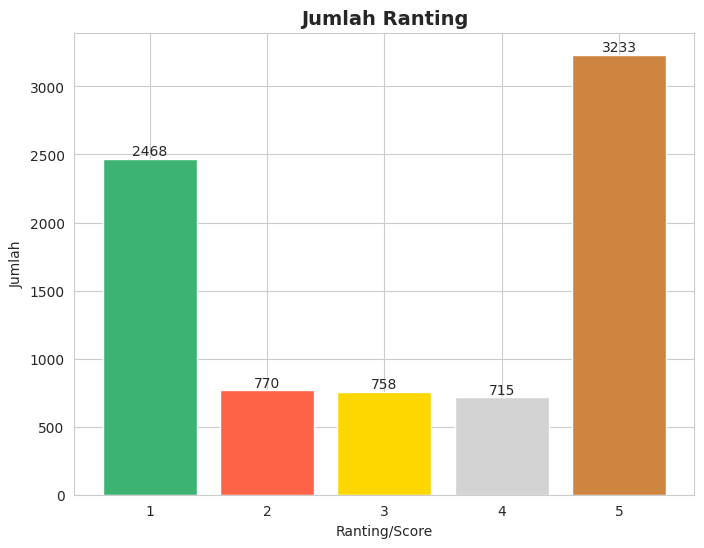

In [71]:
import matplotlib.pyplot as plt

rating_counts = data['score'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['mediumseagreen', 'tomato', 'gold', 'lightgray', 'peru']



plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ranting', fontsize=14, fontweight='bold')
plt.xlabel('Ranting/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()